# Written text as operational data

Written text is one type of data

### Why people write?

 - To communicate: their thoughts, feelings, urgency, needs, information

### Why people communicate?

1. To express emotions
1. To share information
1. To enable or elicit an action
1. ...

### We will use written text for the purpose other than 
1. To experience emotion
1. To learn something the author intended us to learn
1. To do what the author intended us to do

### Instead, we will use written text to recognize who wrote it
 - By calculating and comparing word frequencies in written documents
 
See, for example, likely fictional story https://medium.com/@amuse/how-the-nsa-caught-satoshi-nakamoto-868affcef595

### Example 1. Dictionaries in python (associative arrays)

Plot the frequency distribution of words on a web page.

In [1]:
import requests, re
# re is a module for regular expressions: to detect various combinations of characters
import operator

# Start from a simple document
r = requests .get('http://eecs.utk.edu')

# What comes back includes headers and other HTTP stuff, get just the body of the response
t = r.text

# obtain words by splitting a string using as separator one or more (+) space/like characters (\s) 
wds = re.split('\s+',t)

# now populate a dictionary (wf)
wf = {}
for w in wds:
    if w in wf: wf [w] = wf [w] + 1
    else:  wf[w] = 1

# dictionaries can not be sorted, so lets get a sorted *list*        
wfs = sorted (wf .items(), key = operator .itemgetter (1), reverse=True)   

# lets just have no more than 15 words 
ml = min(len(wfs),15)
for i in range(1,ml,1):
    print (wfs[i][0]+"\t"+str(wfs[i][1]))  

<!DOCTYPE	1
PUBLIC	1
"-//IETF//DTD	1
2.0//EN">	1
<html><head>	1
<title>403	1
Forbidden</title>	1
</head><body>	1
<h1>Forbidden</h1>	1
<p>You	1
don't	1
have	1
permission	1
to	1


### Example 2

Lots of markup in the output, lets remove it --- 

use BeautifulSoup and nltk modules and practice some regular expressions.

In [31]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

# we may not care about the usage of stop words
#I added some stop words to exclude unnecessary words
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014','mr','mrs','miss','said','made','time','ï»¿the','"i' ]

# We most likely would like to remove html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

# We also want to remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    wn = re.sub('[,"\.\'&\|:@>*;/=]', "", w)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)
       
# define a function to get text/clean/calculate frequency
def get_wf (URL):
    # first get the web page
    r = requests .get(URL)
    
    # Now clean
    # remove html markup
    t = cleanHtml (r .text) .lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])
    
    # If satisfied with results, lets go to the next step: calculate frequencies
    # We can write a loop to create a dictionary, but 
    # there is a special function for everything in python
    # in particular for counting frequencies (like function table() in R)
    wf = Counter (wds)
    
    # Remove stop words from the dictionary wf
    for k in stop_words:
        wf. pop(k, None)
        
    #how many regular words in the document?
    tw = 0
    for w in wf:
       tw += wf[w] 
        
    
    # Get ordered list
    wfs = sorted (wf .items(), key = operator.itemgetter(1), reverse=True)
    ml = min(len(wfs),15)

    #Reverse the list because barh plots items from the bottom
    return (wfs [ 0:ml ] [::-1], tw)
        
# Now populate two lists    
(wf_ee, tw_ee) = get_wf('http://www.gutenberg.org/ebooks/1342.txt.utf-8')
(wf_bu, tw_bu) = get_wf('http://www.gutenberg.org/ebooks/76.txt.utf-8')

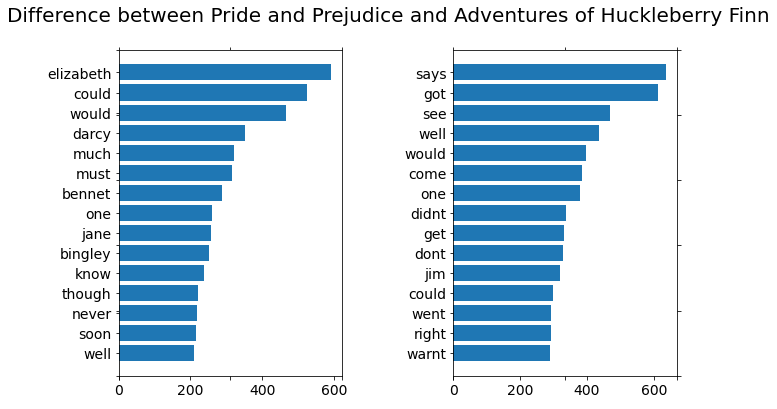

In [22]:
#Plot the results: are there striking differences in language?
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
def plotTwoLists (wf_ee, wf_bu, title):
    f = plt.figure (figsize=(10, 6))
    # this is painfully tedious....
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots, this is the first one
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_ee)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in wf_ee ])
    ax1 .barh (range(len(wf_ee)), [ x [1] for x in wf_ee ], align='center')

    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_bu)) 
    pylab .yticks (pos, [ x [0] for x in wf_bu ])
    ax2 .barh (range (len(wf_bu)), [ x [1] for x in wf_bu ], align='center')

plotTwoLists (wf_ee, wf_bu, 'Difference between Pride and Prejudice and Adventures of Huckleberry Finn')

In [4]:
#In case Project gutenberg is blocked you can download text to your laptop and copy to the docker container via scp
#Assuming the file name you copy is pg4680.txt here is how you change the script
# Please note the option errors='replace'
# without it python invariably runs into unicode errors
f = open ('pg4680.txt', 'r', encoding="ascii", errors='replace')
    
# What comes back includes headers and other HTTP stuff, get just the body of the response
t = f.read()

# obtain words by splitting a string using as separator one or more (+) space/like characters (\s) 
wds = re.split('\s+',t)

# now populate a dictionary (wf)
wf = {}
for w in wds:
    if w in wf: wf [w] = wf [w] + 1
    else:  wf [w] = 1

# dictionaries can not be sorted, so lets get a sorted *list*        
wfs = sorted (wf .items(), key = operator .itemgetter (1), reverse=True)   

# lets just have no more than 15 words 
ml = min(len(wfs),15)
for i in range(1,ml,1):
    print (wfs[i][0]+"\t"+str(wfs[i][1]))  

and	2836
of	2676
to	2646
a	2217
in	1422
his	1205
he	928
that	920
was	823
for	798
with	797
as	672
I	505
you	497


In [23]:
(wf_ee, tw_ee) = get_wf('http://www.gutenberg.org/ebooks/1342.txt.utf-8')
ml = min(len(wf_ee),15)
print ('The most frequent 15 words in Pride and Prejudice excluding stopwords')
for i in range(1,ml,1):
    print (wf_ee[i][0]+"\t"+str(wf_ee[i][1])) 
(wf_bu, tw_bu) = get_wf('http://www.gutenberg.org/ebooks/76.txt.utf-8')
ml2 = min(len(wf_bu),15)
print ('The most frequent 15 words in Adventures of Huckleberry Finn excluding stopwords')
for i in range(1,ml2,1):
    print (wf_bu[i][0]+"\t"+str(wf_bu[i][1])) 

The most frequent 15 words in Pride and Prejudice excluding stopwords
soon	216
never	218
though	220
know	237
bingley	252
jane	257
one	260
bennet	287
must	315
much	323
darcy	352
would	466
could	525
elizabeth	592
The most frequent 15 words in Adventures of Huckleberry Finn excluding stopwords
right	291
went	293
could	299
jim	318
dont	327
get	332
didnt	338
one	378
come	384
would	398
well	436
see	470
got	611
says	636


# Assignment 1

1. Compare word frequencies between two works of a single author.
1. Compare word frequencies between works of two authors.
1. Are there some words preferred by one author but used less frequently by another author?

Extra credit

1. The frequency of a specific word, e.g., "would" should follow a binomial distribution (each regular word in a document is a trial and with probability p that word is "would". The estimate for p is N("would")/N(regular word)). Do these binomial distributions for your chosen word differ significantly between books of the same author or between authors? 

Project Gutenberg is a good source of for fiction and non-fiction.

E.g below are two most popular books from Project Gutenberg:
- Pride and Prejudice at http://www.gutenberg.org/ebooks/1342.txt.utf-8
- Adventures of Huckleberry Finn at http://www.gutenberg.org/ebooks/76.txt.utf-8

In [ ]:
import requests, re, nltk
#In case your text is not on Project Gutenberg but at some other URL
#http://www.fullbooks.com/Our-World-or-The-Slaveholders-Daughter2.html
# that contains 12 parts
t = ""
for i in range(2,13):
  r = requests .get('http://www.fullbooks.com/Our-World-or-The-Slaveholders-Daughter' + str(i) + '.html')
  t = t + r.text

In [ ]:
len(t)

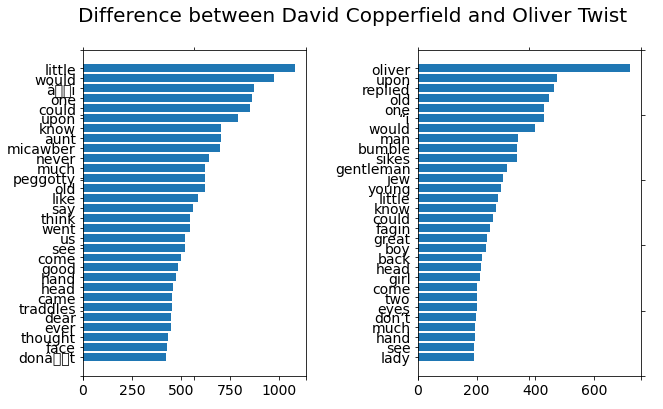

In [32]:
#Question 1: Comparing word frequencies between two works of a single author:

#Two novels by Charles Dickens, 'David Copperfield' and 'Charles Dickens'
(wf_ee, tw_ee) = get_wf('https://www.gutenberg.org/files/766/766-0.txt')
(wf_bu, tw_bu) = get_wf('https://www.gutenberg.org/cache/epub/730/pg730.txt')
#Plot the results: are there striking differences in language?
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
def plotTwoLists (wf_ee, wf_bu, title):
    f = plt.figure (figsize=(10, 6))
    # this is painfully tedious....
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots, this is the first one
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_ee)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in wf_ee ])
    ax1 .barh (range(len(wf_ee)), [ x [1] for x in wf_ee ], align='center')

    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_bu)) 
    pylab .yticks (pos, [ x [0] for x in wf_bu ])
    ax2 .barh (range (len(wf_bu)), [ x [1] for x in wf_bu ], align='center')

plotTwoLists (wf_ee, wf_bu, 'Difference between David Copperfield and Oliver Twist')

In [33]:
ml = min(len(wf_ee),15)
print ('The most frequent 15 words in David Copperfield excluding stopwords')
for i in range(1,ml,1):
    print (wf_ee[i][0]+"\t"+str(wf_ee[i][1])) 
ml2 = min(len(wf_bu),15)
print ('The most frequent 15 words in Oliver Twist excluding stopwords')
for i in range(1,ml2,1):
    print (wf_bu[i][0]+"\t"+str(wf_bu[i][1])) 

The most frequent 15 words in David Copperfield excluding stopwords
face	429
thought	435
ever	447
dear	450
traddles	453
came	454
head	461
hand	476
good	486
come	501
see	518
us	521
went	547
think	548
The most frequent 15 words in Oliver Twist excluding stopwords
see	193
hand	194
much	196
don’t	197
eyes	201
two	203
come	203
girl	213
head	215
back	220
boy	232
great	235
fagin	245
could	256


/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 156 (\x9c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


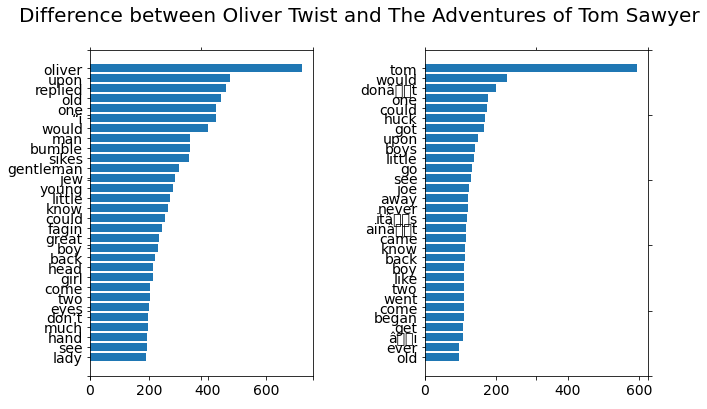

In [34]:
#Question 2: Comparing word frequencies between works of two authors.

#Novel similar to Oliver twist by another author: The Adventures of Tom Sawyer by Mark Twain
(wf_bu2, tw_bu2) = get_wf('https://www.gutenberg.org/files/74/74-0.txt')

#Plot the results: are there striking differences in language?
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
def plotTwoLists (wf_ee, wf_bu, title):
    f = plt.figure (figsize=(10, 6))
    # this is painfully tedious....
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots, this is the first one
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_ee)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in wf_ee ])
    ax1 .barh (range(len(wf_ee)), [ x [1] for x in wf_ee ], align='center')

    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_bu)) 
    pylab .yticks (pos, [ x [0] for x in wf_bu ])
    ax2 .barh (range (len(wf_bu)), [ x [1] for x in wf_bu ], align='center')

plotTwoLists (wf_bu, wf_bu2, 'Difference between Oliver Twist and The Adventures of Tom Sawyer')

In [35]:
ml = min(len(wf_bu),30)
print ('The most frequent 15 words in Oliver Twist excluding stopwords')
for i in range(1,ml,1):
    print (wf_ee[i][0]+"\t"+str(wf_ee[i][1])) 
ml2 = min(len(wf_bu2),30)
print ('The most frequent 15 words in The Adventures of Tom Sawyer excluding stopwords')
for i in range(1,ml2,1):
    print (wf_bu2[i][0]+"\t"+str(wf_bu2[i][1])) 

The most frequent 15 words in Oliver Twist excluding stopwords
face	429
thought	435
ever	447
dear	450
traddles	453
came	454
head	461
hand	476
good	486
come	501
see	518
us	521
went	547
think	548
say	562
like	587
old	620
peggotty	623
much	624
never	644
micawber	699
aunt	703
know	705
upon	792
could	853
one	860
âi	871
would	971
little	1082
The most frequent 15 words in The Adventures of Tom Sawyer excluding stopwords
ever	97
âi	107
get	108
began	109
come	110
went	110
two	110
like	111
boy	111
back	112
know	113
came	115
ainât	117
itâs	118
never	121
away	121
joe	125
see	130
go	131
little	139
boys	140
upon	148
got	167
huck	169
could	174
one	176
donât	200
would	231
tom	594


#Question 3: Are there some words preferred by one author but used less frequently by another author?

Yes. It seems like in the second novel 'The Adventures of Tom Sawyer' the author, Mark Twain, prefers to mention the name of the novel's protagonist more frequently than in the case of the first author, Charles Dickens.

In [18]:
#Use Ngrams to discover patterns in the author's writing. Specifically trying to remember what the novel Oliver Twist was about. 

import nltk
from nltk.util import ngrams
nltk.download('punkt')

# first get the web page
r = requests .get('https://www.gutenberg.org/cache/epub/730/pg730.txt')
    
# Now clean
# remove html markup
t = cleanHtml (r .text) .lower()

# split string into an array of words using any sequence of spaces "\s+" 
wds = re .split('\s+',t)
    
    # remove periods, commas, etc stuck to the edges of words
for i in range(len(wds)):
    wds [i] = cleanWord (wds [i])

filtered_sentence = [w for w in wds if not w.lower() in stop_words]
#Tokens = nltk.word_tokenize(t)  
output = list(nltk.trigrams(filtered_sentence))
print(output)

[nltk_data] Downloading package punkt to /home/relgedaw/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('\ufeffthe', 'project', 'gutenberg'), ('project', 'gutenberg', 'ebook'), ('gutenberg', 'ebook', 'oliver'), ('ebook', 'oliver', 'twist'), ('oliver', 'twist', 'charles'), ('twist', 'charles', 'dickens'), ('charles', 'dickens', 'ebook'), ('dickens', 'ebook', 'use'), ('ebook', 'use', 'anyone'), ('use', 'anyone', 'anywhere'), ('anyone', 'anywhere', 'united'), ('anywhere', 'united', 'states'), ('united', 'states', 'parts'), ('states', 'parts', 'world'), ('parts', 'world', 'cost'), ('world', 'cost', 'almost'), ('cost', 'almost', 'restrictions'), ('almost', 'restrictions', 'whatsoever'), ('restrictions', 'whatsoever', 'may'), ('whatsoever', 'may', 'copy'), ('may', 'copy', 'give'), ('copy', 'give', 'away'), ('give', 'away', 're-use'), ('away', 're-use', 'terms'), ('re-use', 'terms', 'project'), ('terms', 'project', 'gutenberg'), ('project', 'gutenberg', 'license'), ('gutenberg', 'license', 'included'), ('license', 'included', 'ebook'), ('included', 'ebook', 'online'), ('ebook', 'online', 'www

In [19]:
#Getting 3 words after the word Oliver
import re

#r'((?:\S+\s+){3,}\bwhite\b\s*(?:\S+\b\s*){3,})

#re.findall(r'((?:\S+\s+){3,}\boliver\b\s*(?:\S+\b\s*){3,})', t)
print (re.compile(r'oliver\s+((?:\w+(?:\s+|$)){10})').findall(t))

#re.compile(r'at\s+((?:\w+(?:\s+|$)){3})').findall(str1)



['twist was born and of the\r\n         circumstances attending his birth\r\n', 'twist was very near getting a place which\r\n         would not ', 'passed his time in the improving society of his\r\n         reputable ', 'began to lead with his kind friends\r\nxxxiii   wherein the ', 'twist was born and of the\r\ncircumstances attending his birth\r\n\r\n\r\n', 'gave this first proof of the free and proper action ', 'was the victim of a systematic\r\ncourse of treachery and ', 'was about to say that he would go along with ', 'had not been within the walls of the workhouse a ', 'brushed away two or three tears\r\nthat were lingering in ', 'had prayed for the people\r\nwho fed and took care ', 'twist and his companions suffered the tortures of\r\nslow starvation ', 'twist were\r\noffered to any man or woman who wanted ', 'twist was very near getting a place which would not\r\n', 'remained a close prisoner in the dark and\r\nsolitary room ', 'twist and his indentures were to be conveyed b